In [1]:
import os
import numpy as np
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
#Importing out model
from sklearn.ensemble import RandomForestClassifier

In [3]:
#################################### Import Data ##########################################
def import_data(file):
    file_dir = os.getcwd()
    file_path= os.path.join(file_dir,'data/'+file)            ### Make sure the dataset is in the correct folder
    train_data = pd.read_csv(file_path)
    return train_data

In [4]:
############################################## Neural Network Implementation ####################################################
def NeuralNetworkTrain(X_train,y_train,X_test,y_test,model_name):
    train_scores = np.empty(0)
    test_scores = np.empty(0)
    indices = np.empty(0)
    for i in 5, 10, 15:                    #### We are taking only one hidden layer, try with different number of layers
        print("hidden layer: ",i,"\n")
        mlp = MLPClassifier(hidden_layer_sizes=(i,i,i),early_stopping=True,learning_rate='adaptive',learning_rate_init=0.003)
        mlp.fit(X_train,y_train)

        predictions_train = mlp.predict(X_train)
        print("Fitting of train data for size ",i," : \n",classification_report(y_train,predictions_train))

        joblib.dump(mlp, model_name+'.pkl') 
        
        predictions_test = mlp.predict(X_test)
        print("Fitting of test data for size ",i," : \n",classification_report(y_test,predictions_test))

        train_scores = np.append(train_scores, f1_score(y_train,predictions_train,average='macro'))
        test_scores = np.append(test_scores, f1_score(y_test,predictions_test,average='macro'))
        indices = np.append(indices,i)

    
    plt.plot(indices, train_scores)
    plt.plot(indices,test_scores)

    plt.legend(['Train scores','Test scores'],loc='upper left')
    plt.show()

In [5]:
start_time = time.time()        #### Tracking the execution time

print('Loading dataset[gData.csv]. . .')
data = import_data('gData.csv')            #### Importing data
print('Loading dataset DONE')

Loading dataset[gData.csv]. . .
Loading dataset DONE


In [6]:
data = data.dropna()
train_data, test_data = train_test_split(data, test_size=0.8)

In [7]:
X_train = train_data.iloc[:,2:8]
y_train = train_data.iloc[:,8]

X_test = test_data.iloc[:,2:8]
y_test = test_data.iloc[:,8]

In [8]:
X_train

,ax,ay,az,gx,gy,gz
5777837,-1.087952,2.060348,12.334320,-0.546114,-0.496023,1.579087
5387612,3.524221,-0.153227,9.653301,-0.085827,-0.105985,-0.185398
8523827,-5.975853,-0.612908,9.040393,0.012828,-0.022297,-0.002443
2644399,-1.991951,1.072589,9.500074,0.019548,-0.029627,0.034514
9680097,-1.599327,-1.091756,8.245630,0.350433,0.318939,0.134079
659093,-5.985504,0.028730,7.709330,0.003360,0.008552,-0.014661
9544659,4.194642,1.292869,8.264784,0.001221,0.000809,0.003525
7144348,-1.532270,-4.443583,8.733939,0.257174,0.025962,-0.072082
12280928,5.161899,0.861913,8.236053,-0.018005,0.042542,-0.048584
4999103,-10.812215,-6.914454,9.825804,-0.005630,-0.001053,-0.001144


Training the dataset. . .
hidden layer:  5 

Fitting of train data for size  5  : 
               precision    recall  f1-score   support

         1.0       0.60      0.91      0.73    370653
         2.0       0.85      0.98      0.91    398506
         3.0       0.42      0.50      0.45    437450
         4.0       0.38      0.36      0.37    356927
         5.0       0.48      0.07      0.13    323218
         6.0       0.49      0.44      0.46    369101

   micro avg       0.56      0.56      0.56   2255855
   macro avg       0.54      0.54      0.51   2255855
weighted avg       0.54      0.56      0.52   2255855

Fitting of test data for size  5  : 
               precision    recall  f1-score   support

         1.0       0.60      0.91      0.73   1480839
         2.0       0.85      0.98      0.91   1593413
         3.0       0.42      0.50      0.45   1754951
         4.0       0.38      0.36      0.37   1425083
         5.0       0.48      0.07      0.13   1292678
         6

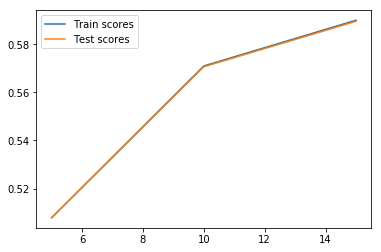

Training DONE. . .


In [9]:
print('Training the dataset. . .')
NeuralNetworkTrain(X_train,y_train,X_test,y_test,'accel_gyro')
print('Training DONE. . .')

In [10]:
print('Loading dataset[aData.csv]. . .')
data = import_data('aData.csv')            #### Importing data
print('Loading dataset DONE')

Loading dataset[aData.csv]. . .
Loading dataset DONE


In [11]:
data = data.dropna()
train_data, test_data = train_test_split(data, test_size=0.8)

In [12]:
X_train = train_data.iloc[:,2:5]
y_train = train_data.iloc[:,5]

X_test = test_data.iloc[:,2:5]
y_test = test_data.iloc[:,5]

Training the dataset. . .
hidden layer:  5 

Fitting of train data for size  5  : 
               precision    recall  f1-score   support

         1.0       0.64      0.91      0.75    370110
         2.0       0.85      0.98      0.91    399155
         3.0       0.43      0.44      0.43    439543
         4.0       0.37      0.49      0.42    356314
         5.0       0.54      0.05      0.10    322472
         6.0       0.49      0.43      0.46    368261

   micro avg       0.56      0.56      0.56   2255855
   macro avg       0.56      0.55      0.51   2255855
weighted avg       0.56      0.56      0.52   2255855

Fitting of test data for size  5  : 
               precision    recall  f1-score   support

         1.0       0.64      0.91      0.75   1481382
         2.0       0.85      0.98      0.91   1592764
         3.0       0.43      0.44      0.43   1752858
         4.0       0.37      0.49      0.42   1425696
         5.0       0.55      0.06      0.10   1293424
         6

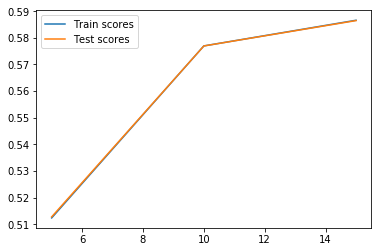

Training DONE. . .
time elapsed:  1689.8443703651428


In [13]:
print('Training the dataset. . .')
NeuralNetworkTrain(X_train,y_train,X_test,y_test,'accel')
print('Training DONE. . .')
print ("time elapsed: ", format(time.time() - start_time)) #### This will take 6-7 minutes if you take the entire dataset